In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, recall_score, precision_score

# Tasks to be performed

### **1. Data Analysis**

Import the dataset  
Get information about the dataset (mean, max, min, quartiles etc.)  
Find the correlation between all fields  

In [89]:
data = pd.read_csv('dataset.csv')

In [90]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [92]:
data.duplicated().sum()

1

In [93]:
dup_rows = data[data.duplicated()]
dup_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [94]:
data.drop(dup_rows.index, inplace=True)

In [95]:
data.duplicated().sum()

0

In [96]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [97]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


### **2. Data visualization**

Visualize the number of patients having a heart disease and not having a heart disease  
Visualize the age and whether a patient has disease or not  
Visualize correlation between all features using a heat map  

In [98]:
hd = data['target'].value_counts()
hd

target
1    164
0    138
Name: count, dtype: int64

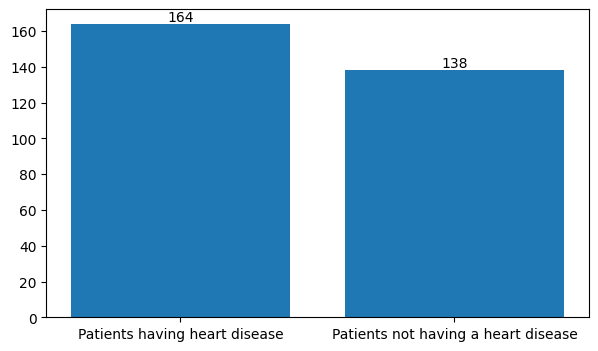

In [99]:
figure = plt.figure(figsize=(7,4))
bar = plt.bar(['Patients having heart disease', 'Patients not having a heart disease'], hd.values)
plt.bar_label(bar)
plt.show()

C:\Users\nooru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nooru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nooru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

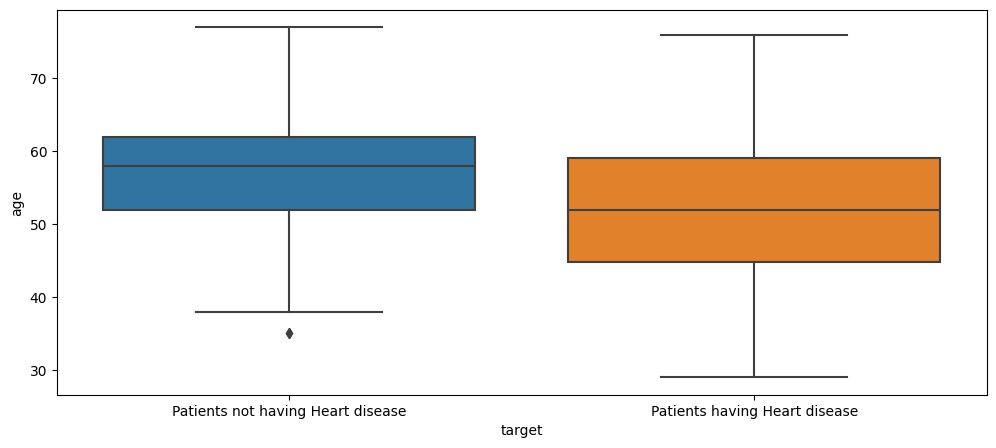

In [100]:
figure = plt.figure(figsize=(12,5))
boxplot = sns.boxplot(data = data, x = 'target', y = 'age')
plt.xticks([0,1], ['Patients not having Heart disease', 'Patients having Heart disease'])
plt.show()

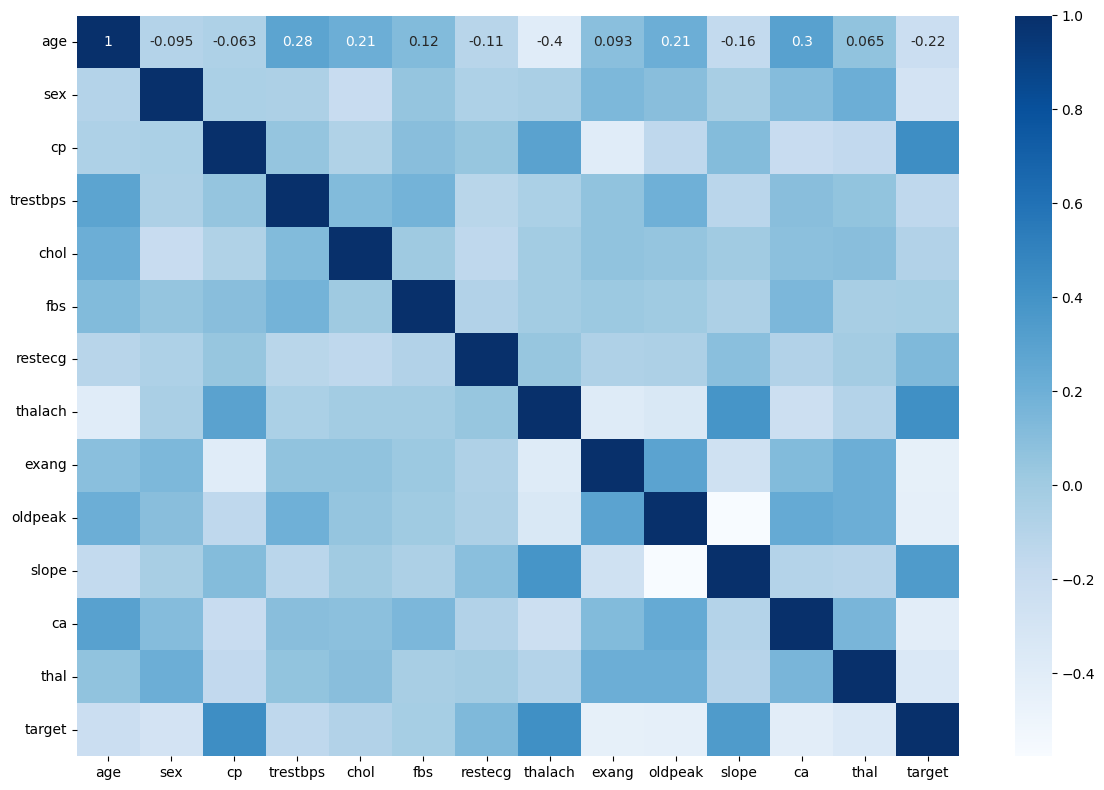

In [101]:
figure = plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot= True, cmap = 'Blues')
plt.tight_layout()
plt.show()

### **3. Logistic Regression**

Build a simple logistic regression model:  
i. Divide the dataset in 70:30 ratio  
ii. Build the model on train set and predict the values on test set  
iii. Build the confusion matrix and get the accuracy score  

In [102]:
df = data.copy()
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [103]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=42)

In [104]:
stdsc = StandardScaler()

In [105]:
xtrain = stdsc.fit_transform(xtrain)
xtest = stdsc.transform(xtest)

In [106]:
logr = LogisticRegression()
logr.fit(xtrain,ytrain)

LogisticRegression()

In [107]:
logypred = logr.predict(xtest)

In [108]:
cmat = confusion_matrix(ytest,logypred)
cmat

array([[34,  8],
       [ 9, 40]], dtype=int64)

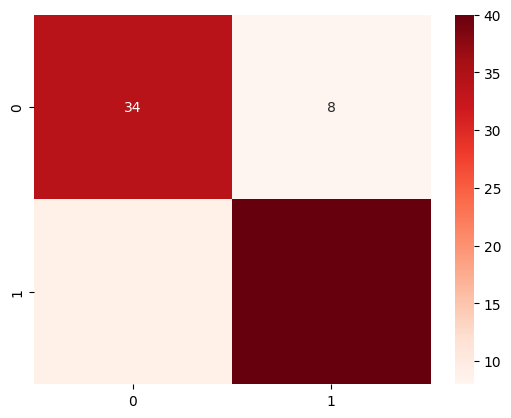

In [109]:
sns.heatmap(cmat, annot=True, cmap = 'Reds')
plt.show()

In [110]:
log_acc = accuracy_score(ytest,logypred)
log_acc

0.8131868131868132

### **4. Decision Tree**

Build a decision tree model:  
i. Divide the dataset in 70:30 ratio  
ii. Build the model on train set and predict the values on test set  
iii. Build the confusion matrix and calculate the accuracy  

In [111]:
dt = DecisionTreeClassifier()

In [112]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [113]:
dtypred = dt.predict(xtest)

In [114]:
cmat = confusion_matrix(ytest,dtypred)
cmat

array([[34,  8],
       [11, 38]], dtype=int64)

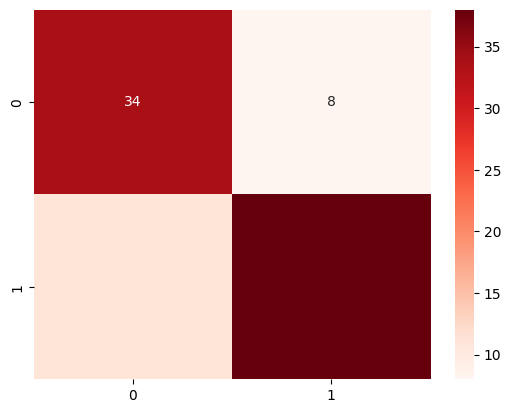

In [115]:
sns.heatmap(cmat, annot=True, cmap = 'Reds')
plt.show()

In [116]:
dt_acc = accuracy_score(ytest,dtypred)

### **5. Random Forest**

Build a Random Forest model:  
i. Divide the dataset in 70:30 ratio  
ii. Build the model on train set and predict the values on test set  
iii. Build the confusion matrix and calculate the accuracy  

In [117]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [118]:
rfypred = rf.predict(xtest)

In [119]:
cmat = confusion_matrix(ytest,rfypred)
cmat

array([[34,  8],
       [ 8, 41]], dtype=int64)

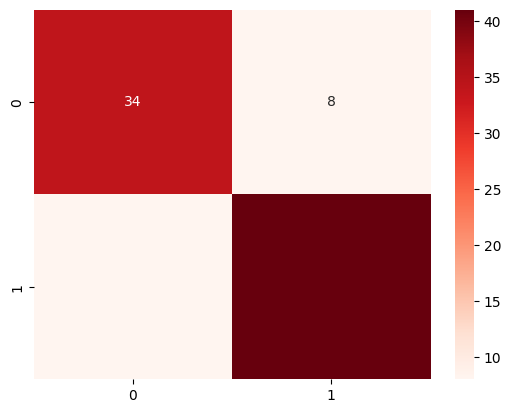

In [120]:
sns.heatmap(cmat, annot=True, cmap = 'Reds')
plt.show()

In [35]:
rf_acc = accuracy_score(ytest,rfypred)

0.8241758241758241

### 6. Best Model

In [122]:
print(classification_report(ytest,logypred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        42
           1       0.83      0.82      0.82        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [123]:
print(classification_report(ytest, dtypred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78        42
           1       0.83      0.78      0.80        49

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [124]:
print(classification_report(ytest,rfypred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        42
           1       0.84      0.84      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



Among the above models, Random Forest gives good results.